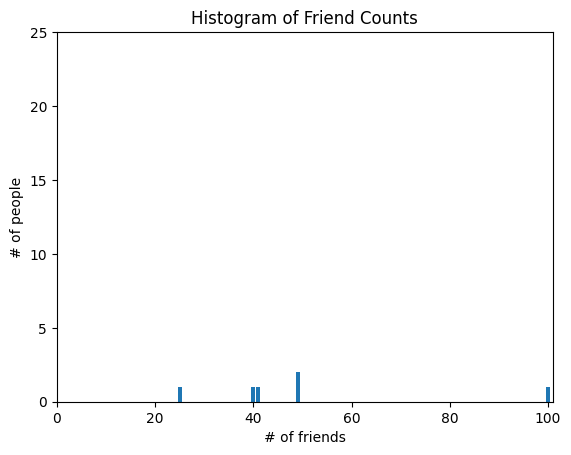

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
my_friends = [100, 49, 41, 40, 25, 49]
friend_counts = Counter(my_friends)
#print(friend_counts)
xs = range(101)
#xs
ys = [friend_counts[x] for x in xs]
#ys
plt.bar(xs, ys)
plt.axis([0, 101, 0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [33]:
num_points = len(my_friends)
#num_points
largest_value = max(my_friends)
smallest_value = min(my_friends)
print(largest_value) 
print(smallest_value)

100
25


In [45]:
sorted_values = sorted(my_friends)
#sorted_values
smallest_value = sorted_values[0]
#smallest_value
second_smallest_value = sorted_values[1]
#second_smallest_value
largest_value = sorted_values[-1]
#largest_value
second_largest_value = sorted_values[-2]
#second_largest_value

In [1]:
my_friends = [100, 49, 41, 40, 25, 49]
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]
#quantile(my_friends, 0.10)
#quantile(my_friends, 0.25)
#quantile(my_friends, 0.75)
quantile(my_friends, 0.90)

100

In [2]:
from collections import Counter
my_friends = [100, 49, 41, 40, 25, 49]
def mode(x):
    counts = Counter(x)
    #print(count)
    max_count = max(counts.values())
    #print(max_count)
    return [x_i for x_i, count in counts.items()
           if count == max_count]
mode(my_friends)

[49]

In [3]:
#Dispersion
my_friends = [100, 49, 41, 40, 25, 49]
def data_range(x):
    #print(max(x))
    #print(min(x))
    return max(x) - min(x)
data_range(my_friends)

75

In [4]:
#Variance is a measure of dispersion
from statistics import mean
my_friends = [20, 10, 5]
def sum_of_squares(x):
    sum = 0
    for i in x:
        sum = sum + (i*i)
    return sum
def de_mean(x):
    x_bar = mean(x)
    #print(x_bar)
    return [x_i - x_bar for x_i in x]
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)
variance(my_friends)

58.33333333333333

In [5]:
#Standard Deviation
from math import sqrt
def standard_deviation(x):
    return sqrt(variance(x))
standard_deviation(my_friends)

7.637626158259733

In [8]:
#Covariance measures how two variables vary in tandem from their mean
import numpy
my_friends = [100, 49, 41, 40, 25, 49]
daily_minutes = [70, 170, 40, 65, 120, 26]
def covariance(x, y):
    n = len(x)
    return numpy.dot(de_mean(x), de_mean(y)) / (n-1)
covariance(my_friends, daily_minutes)

-206.66666666666666

In [9]:
#correlation
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if (stdev_x > 0 and stdev_y >0):
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0
correlation(my_friends, daily_minutes)

-0.14915473233097842

In [20]:
outlier = my_friends.index(100)
#print(outlier)
list = []
my_friends_good = [x for i, x in enumerate(my_friends)
                  if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                     if i != outlier]
correlation(my_friends_good, daily_minutes_good)

-0.1416111564267981

In [1]:
#Finding Correlation
from math import sqrt
from statistics import mean 
import numpy
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

def sum_of_squares(x):
    sum = 0
    for i in x:
        sum = sum + (i**2)
    return sum 

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
    
def variance(x):
    n = len(x)
    deviation = de_mean(x)
    return sum_of_squares(deviation) / (n-1)

def covariance(x, y):
    n = len(x)
    return numpy.dot(de_mean(x), de_mean(y)) / (n-1)
    
def standard_deviation(x):
    return sqrt(variance(x))

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if (stdev_x > 0 and stdev_y > 0):
       return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0
correlation(x, y)

0.0

In [2]:
#perfect correlation 
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
correlation(x, y)

1.0

In [4]:
import random
def random_kid():
    return random.choice(["boy", "girl"])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1
print ("P(both | older): ", both_girls / older_girl)
print ("P(both | either): ", both_girls / either_girl)

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325


In [1]:
#Normal Distribution Function
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp((-(x-mu)**2) / (2*(sigma**2))) / (sqrt_two_pi * sigma))
normal_pdf(5)

1.4867195147342979e-06

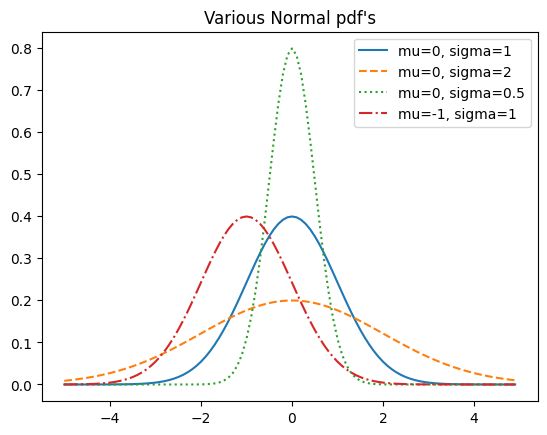

In [2]:
#Various Normal Probability Density Function
import matplotlib.pyplot as plt
xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.title("Various Normal pdf's")
plt.legend()
plt.show()

In [3]:
#Normal Cumulative Distribution Function
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf(((x-mu) / math.sqrt(2)) / sigma)) / 2
normal_cdf(5)

0.9999997133484282

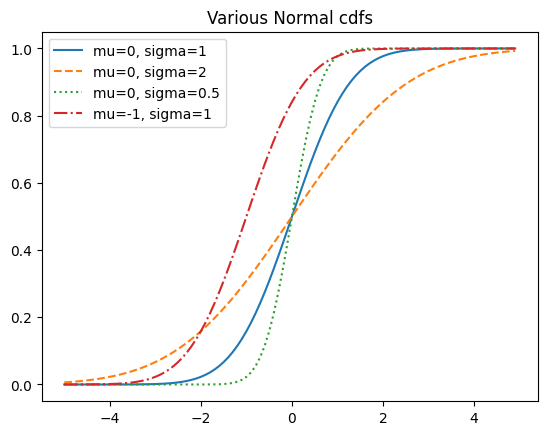

In [4]:
#Normal Cumulative Distribution Function Plot
import math
import matplotlib.pyplot as plt
xs = [x/10.0 for x in range(-50, 50)]
#print(xs)
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.title("Various Normal cdfs")
plt.legend()
plt.show()

In [5]:
#Inverse of Normal cdf
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + (sigma * inverse_normal_cdf(p, tolerance=tolerance))
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while (hi_z - low_z) > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z
inverse_normal_cdf(5)

9.999990463256836

In [6]:
#Bernoulli Trial
import random
import math
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))


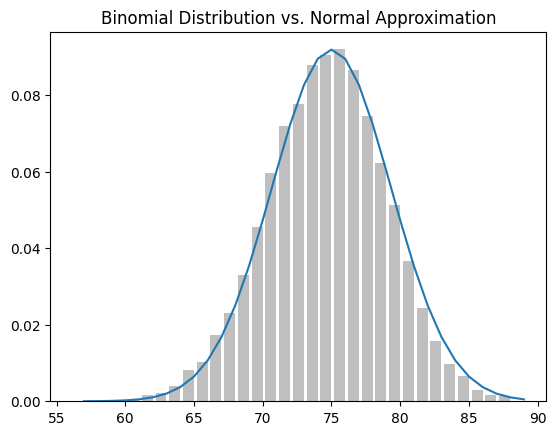

In [7]:
import math
from collections import Counter
import matplotlib.pyplot as plt
def make_hist(p, n, num_points):
    data = [binomial(n, p)for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
make_hist(0.75, 100, 10000)

In [8]:
#Hypothesis and Inference
def normal_approximation_to_binomial(n, p):
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    return mu, sigma
normal_probability_below = normal_cdf
#It's above the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)
#It's between if it's less than hi, not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)
#It's outside not betweeen
def normal_probability_outside(lo, hi, mu, sigma):
    return 1 - normal_probability_between(lo, hi, mu, sigma)
def normal_upper_bound(probability, mu=0, sigma=1):
    return inverse_normal_cdf(probability, mu, sigma)
def normal_lower_bound(probability, mu=0, sigma=1):
    return inverse_normal_cdf(1-probability, mu, sigma)
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    tail_probability = (1-probability) / 2
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
normal_two_sided_bounds(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

In [9]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(lo)
print(hi)

469.01026640487555
530.9897335951244


In [10]:
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
print(mu_1)
print(sigma_1)

550.0
15.732132722552272


In [11]:
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
print(type_2_probability)

0.11345199870463285


In [12]:
power = 1 - type_2_probability
print(power)

0.8865480012953671


In [13]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
hi

526.0073585242053

In [14]:
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
print(type_2_probability)

0.06362051966928262


In [15]:
power = 1 - type_2_probability
print(power)

0.9363794803307174


In [16]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        return 2 * normal_probability_below(x, mu, sigma)
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [17]:
import random
extreme_value_count = 0
for _ in range(100000):
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1
print(extreme_value_count / 100000)

0.06212


In [18]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [19]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt((p_hat * (1-p_hat)) / 1000)
print(mu)
print(sigma)

0.525
0.015791611697353755


In [20]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

In [21]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt((p_hat * (1-p_hat)) / 1000)
print(mu, sigma)

0.54 0.015760710643876435


In [22]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

In [25]:
#P-Hacking
import random
def run_experiment():
    return [random.random() < 0.5 for _ in range(1000)]
def reject_fairness(experiment):
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejection = len([experiment for experiment in experiments if reject_fairness(experiment)])
print(num_rejection)

46


In [1]:
#Gradient Descent
import math
def sum_of_squares(v):
    return sum(v_i ** 2 for v_i in v)
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h
def square(x):
    return x*x
def derivative(x):
    return 2 * x

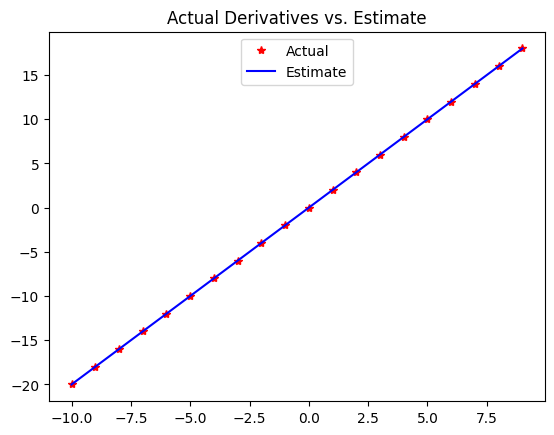

In [2]:
from functools import partial
import matplotlib.pyplot as plt
derivative_estimate = partial(difference_quotient, square, h = 0.00001)
x = range(-10, 10)
plt.title("Actual Derivatives vs. Estimate")
plt.plot(x, list(map(derivative, x)), 'r*', label="Actual")
plt.plot(x, list(map(derivative_estimate, x)), 'b', label="Estimate")
plt.legend(loc=9)
plt.show()

In [3]:
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

In [4]:
import random
def step(v, direction, step_size):
    return [v_i + (step_size * direction_i) for v_i, direction_i in zip(v, direction)]
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]
#pick a random Starting Point
v = [random.randint(-10, 10) for i in range(3)]
tolerance = 0.0000001
while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v

NameError: name 'distance' is not defined

In [1]:
#Choosing the right step size 
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [2]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]
        next_theta = min(next_thetas, key = target_fn)
        next_value = target_fn(next_theta)
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, vlaue = next_theta, next_value

In [3]:
def negate(f):
    return lambda *args, **kwargs: -f(*args, **kwargs)
def negate_all(f):
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn), negate_all(gradient_fn), theta_0, tolerance)

In [1]:
###################################

In [4]:
import sys, re
regex = sys.argv[1]


In [12]:
#Import Libraries
import numpy as np
from scipy import stats as st
#Define the sample data
np.random.seed(0)
data = np.random.randint(10, 30, 10000)
alphas = [0.90, 0.95, 0.99, 0.995]
for alpha in alphas:
    print(st.norm.interval(alpha=alpha, loc=np.mean(data), scale=st.sem(data)))

(19.408058669371805, 19.5967413306282)
(19.389985370968514, 19.61481462903149)
(19.354662134462213, 19.65013786553779)
(19.341401296842054, 19.66339870315795)
